# Problem Statement
- Build a Multiclass classifier using the CNN model. Use MNIST or any other suitable dataset.

    > a. Perform Data Pre-processing

    > b. Define Model and perform training

    > c. Evaluate Results using confusion matrix.

## a. Perform Data Pre-Processing

### Loading Data

In [5]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Normalizing Values


In [7]:
x_train = x_train/255 # dividing by max Value
x_test = x_test/255

### Visualizing data

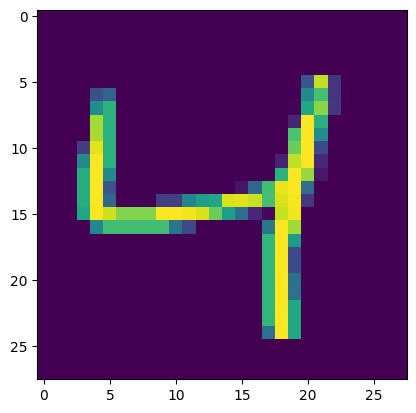

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_train[2]);

## b. Define Model and Perform Training

In [12]:
x_train[0].shape

(28, 28)

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, InputLayer, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    InputLayer(shape=(28,28,1)),


    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(16,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),


    Dense(10,activation='softmax')] # softmax -> more than 2 categories, # sigmoid -> 2 categories
)

model.compile(optimizer='Adam',
              loss='SparseCategoricalCrossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7983 - loss: 0.6074
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9660 - loss: 0.1131
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9759 - loss: 0.0810
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9805 - loss: 0.0637
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9822 - loss: 0.0567
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9846 - loss: 0.0479
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9863 - loss: 0.0414
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0374
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9910 - loss: 0.0297
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9908 - loss: 0.0287


In [14]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9803 - loss: 0.0673


[0.05190383270382881, 0.9851999878883362]

## c. Evaluate Results using confusion matrix.

In [19]:
import numpy as np

y_pred = model.predict(x_test)

y_pred = [np.argmax(pred) for pred in y_pred]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

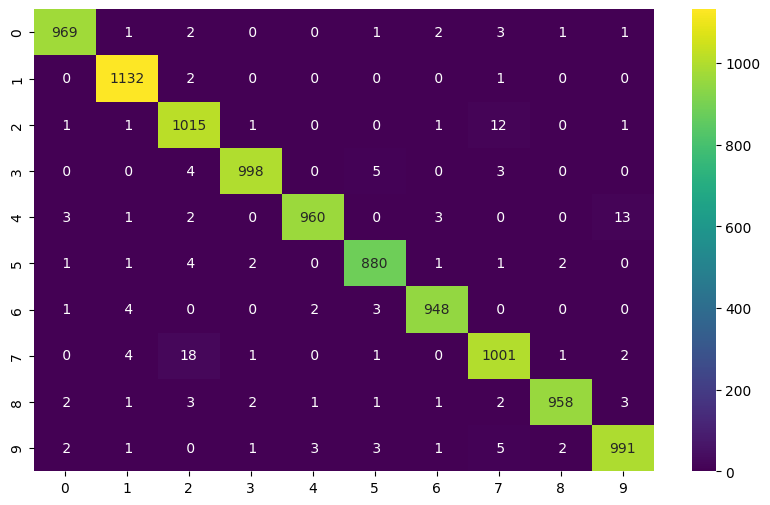

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot = True,cmap='viridis',fmt='2d');